In [1]:
import numpy as np
import numpy.polynomial.polynomial as npoly
from scipy import optimize
import matplotlib.pyplot as plt
np.random.seed(2017)
import pandas as pd




In [15]:
inn_names=["inn"+str(i+1) for i in range(10)]
df=pd.read_csv("./data-case-roadmap/cost_inn_obj.csv",names=["t"]+inn_names,header=0)

In [16]:
df

,t,inn1,inn2,inn3,inn4,inn5,inn6,inn7,inn8,inn9,inn10
0,0.00,2.005313,2.005313,3.999542,4.003277,2.001342,2.995271,1.991868,3.999542,3.005439,4.003277
1,1.25,1.812742,1.812742,3.851631,3.891769,2.039657,2.841247,2.022155,3.851631,3.076452,3.891769
2,2.50,1.805634,1.805634,3.766847,3.816420,2.071891,2.767149,2.075323,3.766847,3.147087,3.816420
3,3.75,1.829715,1.829715,3.734003,3.770581,2.103465,2.735985,2.145044,3.734003,3.217507,3.770581
4,5.00,1.862369,1.862369,3.740252,3.748791,2.137499,2.732811,2.226765,3.740252,3.288066,3.748791
5,6.25,1.900073,1.900073,3.775665,3.746725,2.175745,2.750580,2.317371,3.775665,3.359246,3.746725
6,7.50,1.942118,1.942118,3.833403,3.761004,2.219144,2.785317,2.414810,3.833403,3.431583,3.761004
7,8.75,1.988250,1.988250,3.908960,3.789015,2.268168,2.834428,2.517794,3.908960,3.505619,3.789015
8,10.00,2.038319,2.038319,3.999418,3.828747,2.323021,2.896060,2.625566,3.999418,3.581870,3.828747
9,11.25,2.092229,2.092229,4.102899,3.878665,2.383767,2.968832,2.737734,4.102899,3.660815,3.878665


In [18]:
inn_reg=pd.DataFrame(columns=["Inn","C0R1","C1R1","C0R2","C1R2","C0R3","C1R3","C0R4","C1R4","C0R5","C1R5"])
inn_xrang=pd.DataFrame(columns=["R0","R1","R2","R3","R4","R5"])
inn_yrang=pd.DataFrame(columns=["Y0","Y1","Y2","Y3","Y4","Y5"])

y = 2.005313487514248 - 0.15405702849434308·x¹, if x in [0.0, 1.25]
y = 1.676319922779815 + 0.03799495071844744·x¹, if x in [2.5, 15.0]
y = 1.1270047601544468 + 0.0730431844090503·x¹, if x in [16.25, 28.75]
y = -0.06875392563085349 + 0.1139208279054609·x¹, if x in [30.0, 40.0]
y = -2.0731761526119437 + 0.16322706103818968·x¹, if x in [41.25, 50.0]


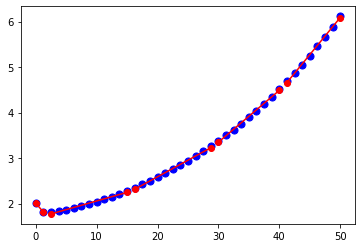

y = 2.005313487514248 - 0.15405702849434308·x¹, if x in [0.0, 1.25]
y = 1.676319922779815 + 0.03799495071844744·x¹, if x in [2.5, 15.0]
y = 1.1270047601544468 + 0.0730431844090503·x¹, if x in [16.25, 28.75]
y = -0.06875392563085349 + 0.1139208279054609·x¹, if x in [30.0, 40.0]
y = -2.0731761526119437 + 0.16322706103818968·x¹, if x in [41.25, 50.0]


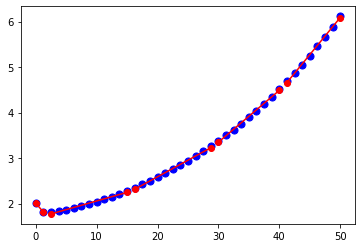

y = 3.9456962570953085 - 0.050896550006038745·x¹, if x in [0.0, 5.0]
y = 3.176752230013784 + 0.08595052906314314·x¹, if x in [6.25, 16.25]
y = 1.7969368785389892 + 0.1672046977715728·x¹, if x in [17.5, 28.75]
y = -0.8960967156934073 + 0.258861309625445·x¹, if x in [30.0, 40.0]
y = -5.405117720060461 + 0.3698122418893084·x¹, if x in [41.25, 50.0]


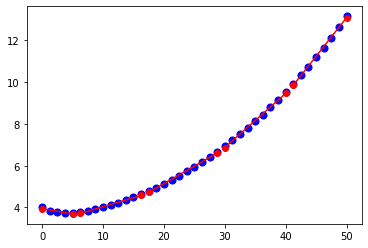

y = 3.972199539432999 - 0.05041282234965071·x¹, if x in [0.0, 5.0]
y = 3.436735413523637 + 0.04203782370159695·x¹, if x in [6.25, 16.25]
y = 2.509374771255607 + 0.09716460399536557·x¹, if x in [17.5, 28.75]
y = 0.792142278232206 + 0.1555706322324924·x¹, if x in [30.0, 40.0]
y = -2.139161451167453 + 0.22768638977196898·x¹, if x in [41.25, 50.0]


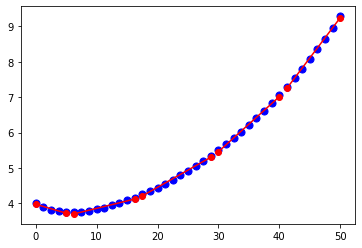

y = 1.987132433663125 + 0.03293110229300614·x¹, if x in [0.0, 11.25]
y = 1.4958045865856802 + 0.07420392550931773·x¹, if x in [12.5, 22.5]
y = 0.5338141435472837 + 0.11599086789614689·x¹, if x in [23.75, 32.5]
y = -0.9690003082288701 + 0.16143359091454088·x¹, if x in [33.75, 41.25]
y = -3.2837346623457813 + 0.21650830527762804·x¹, if x in [42.5, 50.0]


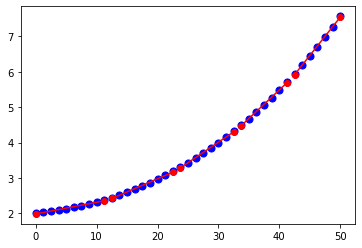

y = 2.940529425129644 - 0.050414684737691784·x¹, if x in [0.0, 5.0]
y = 2.318357812200223 + 0.060881063427504996·x¹, if x in [6.25, 16.25]
y = 1.2451830228484662 + 0.12453843425064318·x¹, if x in [17.5, 28.75]
y = -0.7091862532915121 + 0.19106739538334386·x¹, if x in [30.0, 40.0]
y = -3.9954184221087443 + 0.2719202355564325·x¹, if x in [41.25, 50.0]


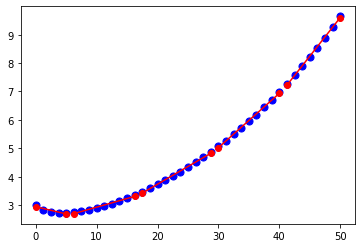

y = 1.9550444595557555 + 0.057448600490668016·x¹, if x in [0.0, 7.5]
y = 1.611906449825091 + 0.10043919300266764·x¹, if x in [8.75, 20.0]
y = 0.6880169582899511 + 0.14488434211134735·x¹, if x in [21.25, 31.25]
y = -1.2220708806800105 + 0.20472811575581928·x¹, if x in [32.5, 41.25]
y = -4.285012576043481 + 0.2779080121004742·x¹, if x in [42.5, 50.0]


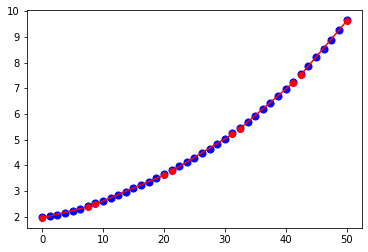

y = 3.9456962570953085 - 0.050896550006038745·x¹, if x in [0.0, 5.0]
y = 3.176752230013784 + 0.08595052906314314·x¹, if x in [6.25, 16.25]
y = 1.7969368785389892 + 0.1672046977715728·x¹, if x in [17.5, 28.75]
y = -0.8960967156934073 + 0.258861309625445·x¹, if x in [30.0, 40.0]
y = -5.405117720060461 + 0.3698122418893084·x¹, if x in [41.25, 50.0]


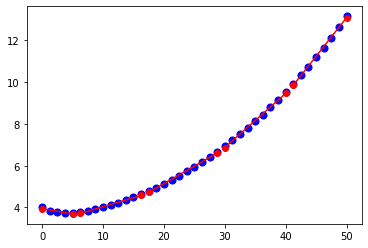

y = 2.992231730230859 + 0.060144520114126514·x¹, if x in [0.0, 15.0]
y = 2.510248507480976 + 0.09124016761642202·x¹, if x in [16.25, 25.0]
y = 1.506730404621568 + 0.13041928985088136·x¹, if x in [26.25, 33.75]
y = -0.18652619286210742 + 0.17945052393974575·x¹, if x in [35.0, 42.5]
y = -2.735175969722698 + 0.2386468504572498·x¹, if x in [43.75, 50.0]


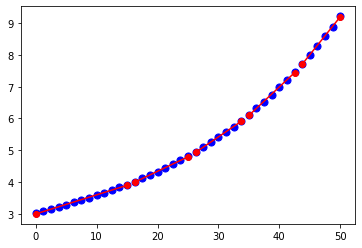

y = 3.972199539432999 - 0.05041282234965071·x¹, if x in [0.0, 5.0]
y = 3.436735413523637 + 0.04203782370159695·x¹, if x in [6.25, 16.25]
y = 2.509374771255607 + 0.09716460399536557·x¹, if x in [17.5, 28.75]
y = 0.792142278232206 + 0.1555706322324924·x¹, if x in [30.0, 40.0]
y = -2.139161451167453 + 0.22768638977196898·x¹, if x in [41.25, 50.0]


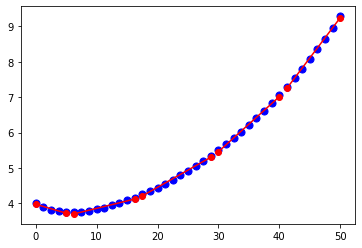

In [26]:
for inn in [i+1 for i in range(10)]:
    def f(breakpoints, x, y, fcache):
        breakpoints = tuple(map(int, sorted(breakpoints)))
        if breakpoints not in fcache:
            total_error = 0
            for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
                total_error += ((f(xi) - yi)**2).sum()
            fcache[breakpoints] = total_error
        # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
        return fcache[breakpoints]

    def find_best_piecewise_polynomial(breakpoints, x, y):
        breakpoints = tuple(map(int, sorted(breakpoints)))
        xs = np.split(x, breakpoints)
        ys = np.split(y, breakpoints)
        result = []
        for xi, yi in zip(xs, ys):
            if len(xi) < 2: continue
            coefs = npoly.polyfit(xi, yi, 1)
            f = npoly.Polynomial(coefs)
            result.append([f, xi, yi])
        return result

    x = np.array(df.t)
    y = np.array(df["inn"+str(inn)])

    num_breakpoints = 4
    breakpoints = optimize.brute(
        f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {}), finish=None)
    count=1
    plt.scatter(x, y, c='blue', s=50)
    for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
        x_interval = np.array([xi.min(), xi.max()])
        inn_reg.loc[inn,"C0R"+str(count)]=round(f.convert().coef[0],3)
        inn_reg.loc[inn,"C1R"+str(count)]=round(f.convert().coef[1],3)
        inn_xrang.loc[inn,"R"+str(count)]=x_interval[1]
        inn_yrang.loc[inn,"Y"+str(count)]=f(x_interval[1])
        print('y = {:35s}, if x in [{}, {}]'.format(str(f), *x_interval))
        count=count+1
        plt.plot(x_interval, f(x_interval), 'ro-')

    inn_reg.loc[inn,"Inn"]=inn
    inn_xrang.loc[inn,"R0"]=0.0
    inn_yrang.loc[inn,"Y0"]=0.0
    #inn_xrang.loc[inn,"Inn"]=inn
    plt.show()
 

https://stackoverflow.com/questions/46218934/piecewise-linear-fit-with-n-breakpoints

In [29]:
inn_reg

,Inn,C0R1,C1R1,C0R2,C1R2,C0R3,C1R3,C0R4,C1R4,C0R5,C1R5
1,1,2.005,-0.154,1.676,0.038,1.127,0.073,-0.069,0.114,-2.073,0.163
2,2,2.005,-0.154,1.676,0.038,1.127,0.073,-0.069,0.114,-2.073,0.163
3,3,3.946,-0.051,3.177,0.086,1.797,0.167,-0.896,0.259,-5.405,0.37
4,4,3.972,-0.05,3.437,0.042,2.509,0.097,0.792,0.156,-2.139,0.228
5,5,1.987,0.033,1.496,0.074,0.534,0.116,-0.969,0.161,-3.284,0.217
6,6,2.941,-0.05,2.318,0.061,1.245,0.125,-0.709,0.191,-3.995,0.272
7,7,1.955,0.057,1.612,0.1,0.688,0.145,-1.222,0.205,-4.285,0.278
8,8,3.946,-0.051,3.177,0.086,1.797,0.167,-0.896,0.259,-5.405,0.37
9,9,2.992,0.06,2.51,0.091,1.507,0.13,-0.187,0.179,-2.735,0.239
10,10,3.972,-0.05,3.437,0.042,2.509,0.097,0.792,0.156,-2.139,0.228


In [30]:
inn_xrang

,R0,R1,R2,R3,R4,R5
1,0.0,1.25,15.0,28.75,40.0,50.0
2,0.0,1.25,15.0,28.75,40.0,50.0
3,0.0,5.0,16.25,28.75,40.0,50.0
4,0.0,5.0,16.25,28.75,40.0,50.0
5,0.0,11.25,22.5,32.5,41.25,50.0
6,0.0,5.0,16.25,28.75,40.0,50.0
7,0.0,7.5,20.0,31.25,41.25,50.0
8,0.0,5.0,16.25,28.75,40.0,50.0
9,0.0,15.0,25.0,33.75,42.5,50.0
10,0.0,5.0,16.25,28.75,40.0,50.0


In [31]:
inn_yrang

,Y0,Y1,Y2,Y3,Y4,Y5
1,0.0,1.812742,2.246244,3.226996,4.488079,6.088177
2,0.0,1.812742,2.246244,3.226996,4.488079,6.088177
3,0.0,3.691214,4.573448,6.604072,9.458356,13.085494
4,0.0,3.720135,4.11985,5.302857,7.014968,9.245158
5,0.0,2.357607,3.165393,4.303517,5.690135,7.541681
6,0.0,2.688456,3.307675,4.825663,6.93351,9.600593
7,0.0,2.385909,3.62069,5.215653,7.222964,9.610388
8,0.0,3.691214,4.573448,6.604072,9.458356,13.085494
9,0.0,3.8944,4.791253,5.908381,7.440121,9.197167
10,0.0,3.720135,4.11985,5.302857,7.014968,9.245158


In [32]:
inn_reg.to_csv("./data-case-roadmap/inn_reg.csv")
inn_xrang.to_csv("./data-case-roadmap/inn_xrang.csv")
inn_yrang.to_csv("./data-case-roadmap/inn_yrang.csv")